In [2]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests
import urllib.request
from bs4 import BeautifulSoup

# Для выполнения операций с регулярными выражениями
import re

# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Сохранить URL-адрес веб-страницы, которую мы хотим извлечь в переменную.
url = 'https://docs.python.org/3/library/random.html#module-random'

In [4]:
# Отправление запроса на получение данных и присваивание ответ переменной.
response = requests.get(url)

In [5]:
response

<Response [200]>

In [6]:
response.content

b'\n<!DOCTYPE html>\n\n<html>\n  <head>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta name="generator" content="Docutils 0.17.1: http://docutils.sourceforge.net/" />\n<meta property="og:title" content="random \xe2\x80\x94 Generate pseudo-random numbers" />\n<meta property="og:type" content="website" />\n<meta property="og:url" content="https://docs.python.org/3/library/random.html" />\n<meta property="og:site_name" content="Python documentation" />\n<meta property="og:description" content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For integers, there is uniform selection from a range. For sequences, there is uniform s..." />\n<meta property="og:image" content="https://docs.python.org/3/_static/og-image.png" />\n<meta property="og:image:alt" content="Python documentation" />\n<meta name="description" content="Source code: Lib/random.py This module impleme

In [7]:
# Преобразование содержимого в объект Beautiful Soup и присвойте его переменной.
soup = BeautifulSoup(response.content)
type(soup)

bs4.BeautifulSoup

In [8]:
# Проверка переменной soup.

soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="Docutils 0.17.1: http://docutils.sourceforge.net/" name="generator"/>
<meta content="random — Generate pseudo-random numbers" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://docs.python.org/3/library/random.html" property="og:url"/>
<meta content="Python documentation" property="og:site_name"/>
<meta content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For integers, there is uniform selection from a range. For sequences, there is uniform s..." property="og:description"/>
<meta content="https://docs.python.org/3/_static/og-image.png" property="og:image"/>
<meta content="Python documentation" property="og:image:alt"/>
<meta content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For i

In [9]:
# Другой способ загрузить html-код, используя 'urllib.request.urlopen()'

#url = urllib.request.urlopen("https://docs.python.org/3/library/random.html#module-random")
#soup = BeautifulSoup(url)
#soup

In [10]:
# Найдите все имена функций — указываем имя элемента в данном случае «dt»

names = soup.body.findAll('dt')

print(names)

[<dt class="sig sig-object py" id="random.seed">
<span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">seed</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">a</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">version</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">2</span></span></em><span class="sig-paren">)</span><a class="headerlink" href="#random.seed" title="Permalink to this definition">¶</a></dt>, <dt class="sig sig-object py" id="random.getstate">
<span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">getstate</span></span><span class="sig-paren">(</span><span class="sig-paren">)</span

In [11]:
# Найдите всю искомую информацию с помощью регулярного выражения
# В этом случае каждая строка начинается с id='random.'

function_names = re.findall('id="random.\w+' , str(names)) # '\w+', означает, что строка должна заканчиваться именем функции.

print(function_names)

['id="random.seed', 'id="random.getstate', 'id="random.setstate', 'id="random.randbytes', 'id="random.randrange', 'id="random.randint', 'id="random.getrandbits', 'id="random.choice', 'id="random.choices', 'id="random.shuffle', 'id="random.sample', 'id="random.binomialvariate', 'id="random.random', 'id="random.uniform', 'id="random.triangular', 'id="random.betavariate', 'id="random.expovariate', 'id="random.gammavariate', 'id="random.gauss', 'id="random.lognormvariate', 'id="random.normalvariate', 'id="random.vonmisesvariate', 'id="random.paretovariate', 'id="random.weibullvariate', 'id="random.Random', 'id="random.SystemRandom']


In [12]:
# Использование методов списка для редактирования наших значений:

function_names = [item[4:] for item in function_names]

print(function_names)

['random.seed', 'random.getstate', 'random.setstate', 'random.randbytes', 'random.randrange', 'random.randint', 'random.getrandbits', 'random.choice', 'random.choices', 'random.shuffle', 'random.sample', 'random.binomialvariate', 'random.random', 'random.uniform', 'random.triangular', 'random.betavariate', 'random.expovariate', 'random.gammavariate', 'random.gauss', 'random.lognormvariate', 'random.normalvariate', 'random.vonmisesvariate', 'random.paretovariate', 'random.weibullvariate', 'random.Random', 'random.SystemRandom']


In [13]:
# Найти все описания функций

description = soup.body.findAll('dd')

#print(description)

In [14]:
# Создание списка

function_usage = []

# Создание цикла

for item in description:
    item = item.text      #  Сохраняем извлеченный текст в переменную
    item = item.replace('\n', ' ')     # чтобы избавиться от оператора следующей строки, которым является `\n`
    function_usage.append(item)


In [15]:
print(function_usage)

['Initialize the random number generator. If a is omitted or None, the current system time is used.  If randomness sources are provided by the operating system, they are used instead of the system time (see the os.urandom() function for details on availability). If a is an int, it is used directly. With version 2 (the default), a str, bytes, or bytearray object gets converted to an int and all of its bits are used. With version 1 (provided for reproducing random sequences from older versions of Python), the algorithm for str and bytes generates a narrower range of seeds.  Changed in version 3.2: Moved to the version 2 scheme which uses all of the bits in a string seed.   Changed in version 3.11: The seed must be one of the following types: NoneType, int, float, str, bytes, or bytearray.  ', 'Return an object capturing the current internal state of the generator.  This object can be passed to setstate() to restore the state. ', 'state should have been obtained from a previous call to ge

In [16]:
print(f' Length of function_names: {len(function_names)}')
print(f' Length of function_usage: {len(function_usage)}')

 Length of function_names: 26
 Length of function_usage: 26


Создание базы данных


In [17]:
data = pd.DataFrame( {  'function name': function_names,
                      'function usage' : function_usage  } )

data

,function name,function usage
0,random.seed,Initialize the random number generator. If a i...
1,random.getstate,Return an object capturing the current interna...
2,random.setstate,state should have been obtained from a previou...
3,random.randbytes,Generate n random bytes. This method should no...
4,random.randrange,Return a randomly selected element from range(...
5,random.randint,Return a random integer N such that a <= N <= ...
6,random.getrandbits,Returns a non-negative Python integer with k r...
7,random.choice,Return a random element from the non-empty seq...
8,random.choices,Return a k sized list of elements chosen from ...
9,random.shuffle,Shuffle the sequence x in place. To shuffle an...


In [18]:
data.to_csv('random_function.csv')

In [19]:
# Особые атрибуты таргетинга

#example = soup.body.findAll ('div', attrs = {'id' : 'bookeeping-functions'})
#print(example)    # можно получить более точный результат поиска с помощью BeautifulSoup

Pandas


In [20]:
# URL статистики игрока в 2020 году

url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
url

'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

In [21]:
years = ['2016', '2017', '2018', '2019', '2020']
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
    url = str.format(year)
    print(url)

https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
https://www.basketball-reference.com/leagues/NBA_2020_per_game.html


In [22]:
# проверим URL-адрес статистики игрока в 2020 году

url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

df = pd.read_html(url, header = 0)

print(df)

[      Rk                    Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1              Steven Adams   C  26  OKC  63  63  26.7  4.5   7.6  ...   
1      2               Bam Adebayo  PF  22  MIA  72  72  33.6  6.1  11.0  ...   
2      3         LaMarcus Aldridge   C  34  SAS  53  53  33.1  7.4  15.0  ...   
3      4            Kyle Alexander   C  23  MIA   2   0   6.5  0.5   1.0  ...   
4      5  Nickeil Alexander-Walker  SG  21  NOP  47   1  12.6  2.1   5.7  ...   
..   ...                       ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
672  525                Trae Young  PG  21  ATL  60  60  35.3  9.1  20.8  ...   
673  526               Cody Zeller   C  27  CHO  58  39  23.1  4.3   8.3  ...   
674  527              Tyler Zeller   C  30  SAS   2   0   2.0  0.5   2.0  ...   
675  528                Ante Žižić   C  23  CLE  22   0  10.0  1.9   3.3  ...   
676  529               Ivica Zubac   C  22  LAC  72  70  18.4  3.3   5.3  ...   

      FT%  ORB  DRB   TRB 

In [24]:
#Проверка количества DataFrame в этом списке.

print(f'number of tables in df: {len(df)}')

print('================')

# Поскольку здесь только 1, вытянем 0-й элемент:
df[0].head(20)

number of tables in df: 1


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8


In [26]:
# Присваиваем таблицу переменной df_2020

df_2020 = df[0]
# Проверим заголовок таблицы, который представлен несколько раз в нескольких строках.

df_2020[df_2020.Age == 'Age'].head() # Весь последующий заголовок таблицы выбран для всего этого кадра данных!

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [27]:
# Проверяем длину имеющегося заголовка:

print(f' общее количество избыточных заголовков: {len(df_2020[df_2020.Age == "Age"])} ')

# Удалите избыточные заголовки в кадре данных:
df_2020_new = df_2020.drop(df_2020[df_2020.Age == 'Age'].index)

# Сравните до и после удаления избыточных заголовков с количеством строк:

print(f' всего строк df_2020: {df_2020.shape[0]} ')
print(f' общее количество строк df_2020_new: {df_2020_new.shape[0]} ')
print('=========================================')

df_2020_new.head(20)

 общее количество избыточных заголовков: 26 
 всего строк df_2020: 677 
 общее количество строк df_2020_new: 651 


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8


<ipython-input-29-ed20cf88bd25>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2020_new.PTS,    # Проверка частоты полученнных очков игроком


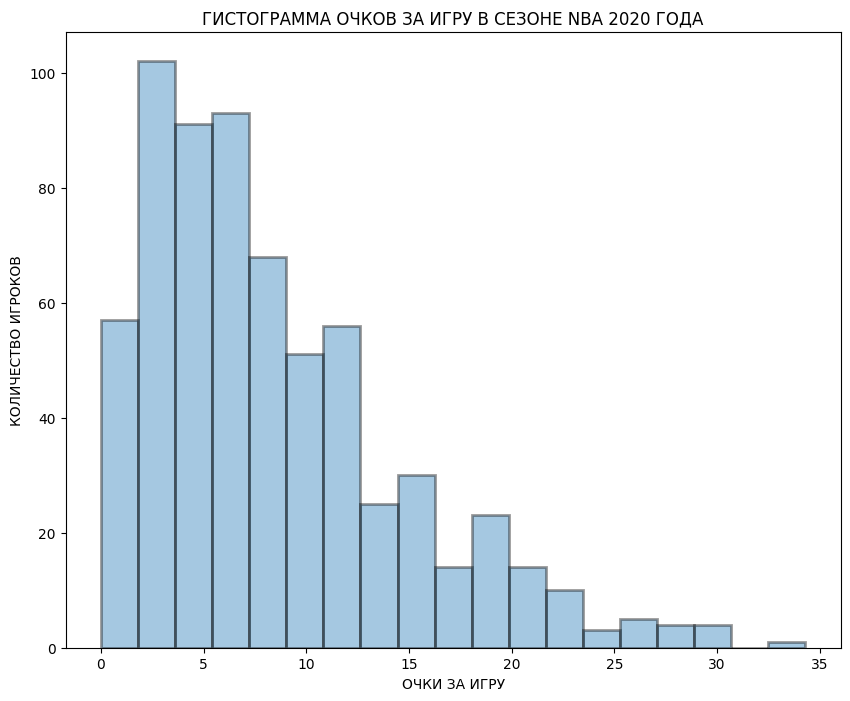

In [29]:
# Создание простой гистограммы

plt.figure(figsize=(10,8))

sns.distplot(df_2020_new.PTS,    # Проверка частоты полученнных очков игроком
            kde= False,          # Должно быть False, потому что  хотим сохранить исходную частоту. ( "kde=True" => это будет вероятность)
            hist_kws = dict( edgecolor = 'black', linewidth=2))

plt.title('ГИСТОГРАММА ОЧКОВ ЗА ИГРУ В СЕЗОНЕ NBA 2020 ГОДА')
plt.ylabel('КОЛИЧЕСТВО ИГРОКОВ')
plt.xlabel('ОЧКИ ЗА ИГРУ')
plt.show()

Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых сайтов:

11. Анализ российских облигаций — https://www.dohod.ru/analytic/bonds

In [32]:
url = 'https://www.dohod.ru/analytic/bonds'
url


'https://www.dohod.ru/analytic/bonds'

In [35]:
url = 'https://www.dohod.ru/ik/analytics/share'
df = pd.read_html(url, header = 0)

print(df)

[      Unnamed: 0                    Акция            Сектор  Unnamed: 3  \
0            NaN                    Акция            Сектор         NaN   
1            NaN  New Fortress Energy Inc            Разное         NaN   
2            NaN    Lantheus Holdings Inc            Разное         NaN   
3            NaN                 Татнефть         Нефть/Газ         NaN   
4            NaN           NRG Energy Inc        Энергетика         NaN   
...          ...                      ...               ...         ...   
1169         NaN                 Аэрофлот         Транспорт         NaN   
1170         NaN               Мостотрест     Строительство         NaN   
1171         NaN                      ОВК    Машиностроение         NaN   
1172         NaN                Лензолото  Металлы и добыча         NaN   
1173         NaN                    Астра           ПО и IT         NaN   

      DCF-потенциал  Unnamed: 5 Value Value.1   Value.2  Unnamed: 9  ...  \
0     DCF-потенциал   

In [36]:
print(f'number of tables in df: {len(df)}')

print('================')

# Поскольку здесь только 1, вытянем 0-й элемент:
df[0].head(20)

number of tables in df: 1


,Unnamed: 0,Акция,Сектор,Unnamed: 3,DCF-потенциал,Unnamed: 5,Value,Value.1,Value.2,Unnamed: 9,...,Dividend.2,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,Акция,Сектор,NaN,DCF-потенциал,NaN,Рост,P/E,Strategy,NaN,...,Strategy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,New Fortress Energy Inc,Разное,NaN,20,NaN,10,9,19,NaN,...,11,Почему покупать ожидаем рост выручки значител...,NFE.O,9941.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,Lantheus Holdings Inc,Разное,NaN,18,NaN,9,9,18,NaN,...,2,Почему покупать ожидаем рост выручки значител...,LNTH.O,9915.0,0.0,0.0,0.0,0.0,1.0,0.0
3,NaN,Татнефть,Нефть/Газ,NaN,17,NaN,10,8,18,NaN,...,17,Почему покупать ожидаем рост выручки значител...,TATN.MM,9975.0,1.0,0.0,0.0,0.0,4.0,0.0
4,NaN,NRG Energy Inc,Энергетика,NaN,20,NaN,8,10,18,NaN,...,11,Почему покупать ожидаем рост выручки быстрее ...,NRG.N,9827.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,China Construction Bank Corp,Финансы и Банки,NaN,20,NaN,6,10,16,NaN,...,19,Почему покупать значительно недооценена по ож...,0939.HK,9996.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NaN,RingCentral Inc,ПО и IT,NaN,18,NaN,9,10,19,NaN,...,2,Почему покупать ожидаем рост выручки значител...,RNG,9877.0,0.0,0.0,-1.0,0.0,-1.0,0.0
7,NaN,Sinopharm Group Co. Ltd.,Медицина,NaN,18,NaN,6,9,15,NaN,...,13,Почему покупать значительно недооценена по ож...,1099.HK,9986.0,-1.0,0.0,0.0,0.0,-1.0,28.0
8,NaN,United Airlines Holdings Inc,Транспорт,NaN,20,NaN,5,9,14,NaN,...,9,Почему покупать значительно недооценена по ож...,UAL.OQ,9850.0,1.0,1.0,6.0,0.0,0.0,0.0
9,NaN,Alaska Air Group Inc,Транспорт,NaN,19,NaN,5,9,14,NaN,...,3,Почему покупать значительно недооценена по ож...,ALK.N,9742.0,0.0,1.0,0.0,0.0,2.0,0.0


from matplotlib import pyplot as plt
_df_0['Unnamed: 23'].plot(kind='hist', bins=20, title='Unnamed: 23')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Unnamed: 24'].plot(kind='hist', bins=20, title='Unnamed: 24')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Unnamed: 25'].plot(kind='hist', bins=20, title='Unnamed: 25')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Unnamed: 26'].plot(kind='hist', bins=20, title='Unnamed: 26')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('DCF-потенциал').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Value.1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Value.2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Smart Estimate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Unnamed: 23', y='Unnamed: 24', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Unnamed: 24', y='Unnamed: 25', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Unnamed: 25', y='Unnamed: 26', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Unnamed: 26', y='Unnamed: 27', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Unnamed: 23'].plot(kind='line', figsize=(8, 4), title='Unnamed: 23')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Unnamed: 24'].plot(kind='line', figsize=(8, 4), title='Unnamed: 24')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Unnamed: 25'].plot(kind='line', figsize=(8, 4), title='Unnamed: 25')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Unnamed: 26'].plot(kind='line', figsize=(8, 4), title='Unnamed: 26')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Value.1'].value_counts()
    for x_label, grp in _df_16.groupby('DCF-потенциал')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DCF-потенциал')
_ = plt.ylabel('Value.1')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Value.2'].value_counts()
    for x_label, grp in _df_17.groupby('Value.1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Value.1')
_ = plt.ylabel('Value.2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Smart Estimate'].value_counts()
    for x_label, grp in _df_18.groupby('Value.2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Value.2')
_ = plt.ylabel('Smart Estimate')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Smart Estimate.1'].value_counts()
    for x_label, grp in _df_19.groupby('Smart Estimate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Smart Estimate')
_ = plt.ylabel('Smart Estimate.1')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['DCF-потенциал'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Unnamed: 23', y='DCF-потенциал', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Value.1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Unnamed: 23', y='Value.1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Value.2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Unnamed: 23', y='Value.2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Smart Estimate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Unnamed: 23', y='Smart Estimate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
df_stock = df[0]

In [48]:
df_stock[df_stock.Value == 'Value'].head()

,Unnamed: 0,Акция,Сектор,Unnamed: 3,DCF-потенциал,Unnamed: 5,Value,Value.1,Value.2,Unnamed: 9,...,Dividend.2,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29


In [49]:
# Проверяем длину имеющегося заголовка:

print(f' общее количество избыточных заголовков: {len(df_stock[df_stock.Value == "Value"])} ')

# Удалите избыточные заголовки в кадре данных:
df_stock_new = df_stock.drop(df_stock[df_stock.Value == 'Value'].index)

# Сравните до и после удаления избыточных заголовков с количеством строк:

print(f' всего строк df_stock: {df_stock.shape[0]} ')
print(f' общее количество строк df_stock_new: {df_stock_new.shape[0]} ')
print('=========================================')

df_stock_new.head

 общее количество избыточных заголовков: 0 
 всего строк df_stock: 1174 
 общее количество строк df_stock_new: 1174 


<bound method NDFrame.head of       Unnamed: 0                    Акция            Сектор  Unnamed: 3  \
0            NaN                    Акция            Сектор         NaN   
1            NaN  New Fortress Energy Inc            Разное         NaN   
2            NaN    Lantheus Holdings Inc            Разное         NaN   
3            NaN                 Татнефть         Нефть/Газ         NaN   
4            NaN           NRG Energy Inc        Энергетика         NaN   
...          ...                      ...               ...         ...   
1169         NaN                 Аэрофлот         Транспорт         NaN   
1170         NaN               Мостотрест     Строительство         NaN   
1171         NaN                      ОВК    Машиностроение         NaN   
1172         NaN                Лензолото  Металлы и добыча         NaN   
1173         NaN                    Астра           ПО и IT         NaN   

      DCF-потенциал  Unnamed: 5 Value Value.1   Value.2  Unnamed: 9  

Beautiful Soup

In [59]:
# Сохранить URL-адрес веб-страницы, которую мы хотим извлечь в переменную.
url = 'https://www.dohod.ru/ik/analytics/stockmap'

In [60]:
# Преобразование содержимого в объект Beautiful Soup и присвойте его переменной.
soup = BeautifulSoup(response.content)
type(soup)

bs4.BeautifulSoup

In [61]:
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="Docutils 0.17.1: http://docutils.sourceforge.net/" name="generator"/>
<meta content="random — Generate pseudo-random numbers" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://docs.python.org/3/library/random.html" property="og:url"/>
<meta content="Python documentation" property="og:site_name"/>
<meta content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For integers, there is uniform selection from a range. For sequences, there is uniform s..." property="og:description"/>
<meta content="https://docs.python.org/3/_static/og-image.png" property="og:image"/>
<meta content="Python documentation" property="og:image:alt"/>
<meta content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For i

In [62]:
# Найдите все имена функций — указываем имя элемента в данном случае «dt»

names = soup.body.findAll('dt')

print(names)

[<dt class="sig sig-object py" id="random.seed">
<span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">seed</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">a</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">version</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">2</span></span></em><span class="sig-paren">)</span><a class="headerlink" href="#random.seed" title="Permalink to this definition">¶</a></dt>, <dt class="sig sig-object py" id="random.getstate">
<span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">getstate</span></span><span class="sig-paren">(</span><span class="sig-paren">)</span

In [64]:
# Найдите всю искомую информацию с помощью регулярного выражения
# В этом случае каждая строка начинается с id='random.'

function_names = re.findall('id="random.\w+' , str(names)) # '\w+', означает, что строка должна заканчиваться именем функции.

print(function_names)

TypeError: ignored

In [65]:
# Использование методов списка для редактирования наших значений:

function_names = [item[4:] for item in function_names]

print(function_names)

['om.seed', 'om.getstate', 'om.setstate', 'om.randbytes', 'om.randrange', 'om.randint', 'om.getrandbits', 'om.choice', 'om.choices', 'om.shuffle', 'om.sample', 'om.binomialvariate', 'om.random', 'om.uniform', 'om.triangular', 'om.betavariate', 'om.expovariate', 'om.gammavariate', 'om.gauss', 'om.lognormvariate', 'om.normalvariate', 'om.vonmisesvariate', 'om.paretovariate', 'om.weibullvariate', 'om.Random', 'om.SystemRandom']


In [66]:
# Найти все описания функций

description = soup.body.findAll('dd')

#print(description)

In [67]:
# Создание списка

function_usage = []

# Создание цикла

for item in description:
    item = item.text      #  Сохраняем извлеченный текст в переменную
    item = item.replace('\n', ' ')     # чтобы избавиться от оператора следующей строки, которым является `\n`
    function_usage.append(item)

In [68]:
print(function_usage)

['Initialize the random number generator. If a is omitted or None, the current system time is used.  If randomness sources are provided by the operating system, they are used instead of the system time (see the os.urandom() function for details on availability). If a is an int, it is used directly. With version 2 (the default), a str, bytes, or bytearray object gets converted to an int and all of its bits are used. With version 1 (provided for reproducing random sequences from older versions of Python), the algorithm for str and bytes generates a narrower range of seeds.  Changed in version 3.2: Moved to the version 2 scheme which uses all of the bits in a string seed.   Changed in version 3.11: The seed must be one of the following types: NoneType, int, float, str, bytes, or bytearray.  ', 'Return an object capturing the current internal state of the generator.  This object can be passed to setstate() to restore the state. ', 'state should have been obtained from a previous call to ge

In [69]:
print(f' Length of function_names: {len(function_names)}')
print(f' Length of function_usage: {len(function_usage)}')

 Length of function_names: 26
 Length of function_usage: 26


In [70]:
# Создайте фрейм данных, поскольку длина обеих переменных одинакова!

data = pd.DataFrame( {  'function name': function_names,
                      'function usage' : function_usage  } )

data

,function name,function usage
0,om.seed,Initialize the random number generator. If a i...
1,om.getstate,Return an object capturing the current interna...
2,om.setstate,state should have been obtained from a previou...
3,om.randbytes,Generate n random bytes. This method should no...
4,om.randrange,Return a randomly selected element from range(...
5,om.randint,Return a random integer N such that a <= N <= ...
6,om.getrandbits,Returns a non-negative Python integer with k r...
7,om.choice,Return a random element from the non-empty seq...
8,om.choices,Return a k sized list of elements chosen from ...
9,om.shuffle,Shuffle the sequence x in place. To shuffle an...


No charts were generated by quickchart


In [71]:
# Давайте создадим файл CSV из фрейма данных.

data.to_csv('random_function.csv')